### Plot _thornado_ data

Notebook for quick plotting of 1D _thornado_ data for the limter parameter study. 

---

Action Items:
0. ~~Redo data structure: consider Python dictionary, `data['run']['field']`~~

1. ~~Compute and Plot Cell Averages~~
    
2. ~~Finish Runs~~ 

3. ~~Create Error Function~~

4. ~~Create Total Varaition Calculation~~

5. ~~Create Tables~~
   
6. Do another componentwise limiting run   

7. Shock Detector

8. Compare Winner (2.0, 0.2) to Componentwise. Same parameters. **CW is crashing**
---
To Do (Functional):  

* Make it easier to select what to plot. Currently: Very Manual 
* Want easier use for data from multiple runs
* Combine reading of data and creating data structures into one loop
---

In [2]:
import h5py    
import numpy as np  
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
%matplotlib ipympl

Some global plotting options

In [3]:
mpl.rcParams['lines.linewidth'] = 4
mpl.rcParams['legend.handlelength']=4
mpl.rcParams['legend.fontsize']=14
mpl.rcParams['legend.frameon']=False
mpl.rcParams['axes.labelsize']=20
mpl.rcParams['xtick.minor.visible']=True
mpl.rcParams['ytick.minor.visible']=True
mpl.rcParams['axes.linewidth'] = 2
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['ytick.major.width'] = 2
mpl.rcParams['xtick.minor.width'] = 2
mpl.rcParams['ytick.minor.width'] = 2
mpl.rcParams['xtick.labelsize']   = 14
mpl.rcParams['ytick.labelsize']   = 14

Data Directory. Simply change `simName` to the desired simulation. Later will likely have to modify.

In [4]:
sims = ["100_B1.0_C0.0_3", "100_B1.0_C1.5E-2_3", "100_B1.0_C5E-2_3", "100_B1.0_C1.0E-1_3",
        "100_B1.5_C0.0_3", "100_B1.5_C1.5E-2_3", "100_B1.5_C5E-2_3","100_B1.5_C1.0E-1_3",
        "100_B1.75_C0.0_3", "100_B1.75_C1.5E-2_3", "100_B1.75_C5E-2_3","100_B1.75_C1.0E-1_3",
        "100_B2.0_C0.0_3", "100_B2.0_C1.5E-2_3", "100_B2.0_C5E-2_3", "100_B2.0_C1.0E-1_3"] #The desired run

fields = [ 'uAF_P', 'uAF_Ye', 'uPF_V1', 'uCF_D', 'uCF_Ne' ]
dataDirs = []#np.zeros( len(sims) )
for i in range( len( sims) ):
    dataDirs.append("../../data/Sod/nuclear/paramStudy" + "/" + sims[i])
dataDir_ref = "../../data/Sod/nuclear/reference"

Setup figure directory

In [5]:
figDir = "../figures/"

For now, manually specify the `fileNumber`. Possibly add in ways to automatically get the max.

In [6]:
fileNumber = "000102"
#fileName = dataDir + '/' + simName + '_FluidFields_' + fileNumber + '.h5' 
fileNames = []#np.zeros(len(sims))
for i in range( len( sims) ):
    fileNames.append(dataDirs[i] + '/' + 'RiemannProblem' + '_FluidFields_' + fileNumber + '.h5' )
fileName_ref = dataDir_ref + '/' + 'RiemannProblem' + '_FluidFields_' + fileNumber + '.h5' 

mb = 1.660539 * pow(10,-24)

Read the Data and load into a python dict

In [26]:
data = {} # Point Values
for i in range( len( sims ) ):
    
    with h5py.File(fileNames[i], 'r') as f:
        
#         for key in f.keys():
#             print(key)

        time = f['Time'][:]

        x1 = f['/Spatial Grid/X1'][:]

        uAF_P  = f['/Fluid Fields/Auxiliary/Pressure'][:]
        uAF_Ye = f['/Fluid Fields/Auxiliary/Electron Fraction'][:]

        uPF_V1 = f['/Fluid Fields/Primitive/Three-Velocity (1)' ][:]

        uCF_D = f['/Fluid Fields/Conserved/Conserved Baryon Density'][:]
        uCF_Ne = f['/Fluid Fields/Conserved/Conserved Electron Density'][:]
        
        shock = f['/Shock Detector/Shock'][0][0][:]
        

       # print("Time:", float(time), "ms")

        data[sims[i]] = {}
        data[sims[i]]['x1'] = x1[:]
        data[sims[i]][fields[0]] = uAF_P[0][0][:]
        data[sims[i]][fields[1]] = mb * uCF_Ne[0][0][:] / uCF_D[0][0][:]#uAF_Ye[0][0][:]
        data[sims[i]][fields[2]] = uPF_V1[0][0][:]
        data[sims[i]][fields[3]] = uCF_D[0][0][:]
        data[sims[i]][fields[4]] = uCF_Ne[0][0][:]
        data[sims[i]]['shock'] = shock
#         for j in range(len(fields)):
#             data2[sims[i]][fields[j]] = 
    
## Reference Run    
with h5py.File(fileName_ref, 'r') as f:
    for key in f.keys():
        print(key)
    
    time = f['Time'][:]

    x1_ref = f['/Spatial Grid/X1'][:]
    
    uAF_P_ref  = f['/Fluid Fields/Auxiliary/Pressure'][:]
    uAF_Ye_ref = f['/Fluid Fields/Auxiliary/Electron Fraction'][:]

    uPF_V1_ref = f['/Fluid Fields/Primitive/Three-Velocity (1)' ][:]
    
    uCF_D_ref = f['/Fluid Fields/Conserved/Conserved Baryon Density'][:]
    uCF_Ne_ref = f['/Fluid Fields/Conserved/Conserved Electron Density'][:]
    
    print("Time:", float(time), "ms")
          
      

Fluid Fields
Shock Detector
Spatial Grid
Time
Time: 0.025 ms


Reference run

In [25]:
data_ref = {}
data_ref['x1'] = x1_ref
data_ref['uCF_D'] = uCF_D_ref[0][0][:]
data_ref['uAF_Ye'] = mb * uCF_Ne_ref[0][0][:] / uCF_D_ref[0][0][:] #uAF_Ye_ref[0][0][:]
data_ref['uCF_Ne'] = uCF_Ne_ref[0][0][:]
data_ref['uAF_P'] = uAF_P_ref[0][0][:]
data_ref['uPF_V1'] = uPF_V1_ref[0][0][:]

Compute Cell Averages

Do this by summing over the pts in a cell (nNodes points per cell)

In [27]:
nNodes = 3
wG = [ 5.0/(1*18.0), 8.0/(1*18.0), 5.0/(1*18.0) ]
N_N = len(x1)

N_K = N_N / nNodes

#Make this nicer by creating a summation over len(fields)
data_avg = {}
for i in range( len( sims ) ):
    data_avg[sims[i]] = {}
    data_avg[sims[i]]['x1'] = np.zeros(int(N_K)) #Create arrays of length N_K
    data_avg[sims[i]][fields[0]] = np.zeros(int(N_K))
    data_avg[sims[i]][fields[1]] = np.zeros(int(N_K))
    data_avg[sims[i]][fields[2]] = np.zeros(int(N_K))
    data_avg[sims[i]][fields[3]] = np.zeros(int(N_K))
    data_avg[sims[i]][fields[4]] = np.zeros(int(N_K))
    for j in range(int(N_K)):
        data_avg[sims[i]]['x1'][j] = (np.sum( wG * data[sims[i]]['x1'][(j)*nNodes:(j+1)*nNodes] ))
        data_avg[sims[i]][fields[0]][j] = np.sum( wG * data[sims[i]][fields[0]][(j)*nNodes:(j+1)*nNodes] )
        data_avg[sims[i]][fields[1]][j] = np.sum( wG * data[sims[i]][fields[1]][(j)*nNodes:(j+1)*nNodes] )
        data_avg[sims[i]][fields[2]][j] = np.sum( wG * data[sims[i]][fields[2]][(j)*nNodes:(j+1)*nNodes] )
        data_avg[sims[i]][fields[3]][j] = np.sum( wG * data[sims[i]][fields[3]][(j)*nNodes:(j+1)*nNodes] )
        data_avg[sims[i]][fields[4]][j] = np.sum( wG * data[sims[i]][fields[4]][(j)*nNodes:(j+1)*nNodes] )

Error Functions

In [28]:
#1. Interpolate data_ref onto data
x = np.linspace(-5,5,len(data_ref['x1']))
data_interp = {}

error = {}
for i in range( len( sims ) ):
    data_interp[sims[i]] = {}
    error[sims[i]] = {}
    data_interp[sims[i]]['x1'] = np.interp(data[sims[i]]['x1'],x,data_ref['x1'])
    for j in range(len(fields)):
        data_interp[sims[i]][fields[j]] = np.interp(data[sims[i]]['x1'],x,data_ref[fields[j]])
        error[sims[i]][fields[j]] = (1/300.0) * sum(abs((data_interp[sims[i]][fields[j]] - data[sims[i]][fields[j]]) ) / data_interp[sims[i]][fields[j]] )


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in true_divide
  if sys.path[0] == '':


Construct a Nicer Error Numpy Matrix

In [29]:

errMat = np.zeros((4, 4))

errMat[0,0] = error[sims[12]]['uCF_D']
errMat[0,1] = error[sims[13]]['uCF_D']
errMat[0,2] = error[sims[14]]['uCF_D']
errMat[0,3] = error[sims[15]]['uCF_D']
errMat[1,0] = error[sims[8]]['uCF_D']
errMat[1,1] = error[sims[9]]['uCF_D']
errMat[1,2] = error[sims[10]]['uCF_D']
errMat[1,3] = error[sims[11]]['uCF_D']
errMat[2,0] = error[sims[4]]['uCF_D']
errMat[2,1] = error[sims[5]]['uCF_D']
errMat[2,2] = error[sims[6]]['uCF_D']
errMat[2,3] = error[sims[7]]['uCF_D']
errMat[3,0] = error[sims[0]]['uCF_D']
errMat[3,1] = error[sims[1]]['uCF_D']
errMat[3,2] = error[sims[2]]['uCF_D']
errMat[3,3] = error[sims[3]]['uCF_D']

In [11]:
print(errMat[3,0])
print(errMat[0,0])

0.021411463763005355
0.007702979700381697


Plot Error Heatmaps

<Figure size 576x288 with 0 Axes>

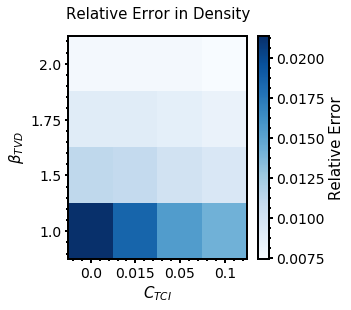

In [30]:
plt.figure(figsize = (8,4))
#plt.rcParams["figure.figsize"] = [15,4]
cmap = plt.get_cmap('Blues')
cax = plt.matshow(errMat, cmap = cmap)
cax.cmap.set_under('whitesmoke')
#cax.set_clim(0,1.5)
cbar = plt.colorbar(cax)
cbar.set_label(r'Relative Error', fontsize=15)


### Set the axes settings
Bvals = [2.0, 1.75, 1.5, 1.0]
ax = plt.gca() # grab the current axis
yticks = ax.set_yticks((range(4)))
ax.set_yticklabels(Bvals)
ax.set_ylabel(r"$\beta_{TVD}$", fontsize=15)

Cvals = [0.0, 0.015, 0.05, 0.1]
yticks = ax.set_xticks((range(len(Cvals))))
#ax.set_xticks(Cvals) # choose which x locations to have ticks
ax.set_xticklabels(Cvals) 
ax.xaxis.set_label_position('bottom')
ax.set_xlabel(r"$C_{TCI}$", fontsize=15)#,fontsize=16)
ax.xaxis.tick_bottom()

ax.set_title(r"Relative Error in Density",fontsize=15)

ax.set_aspect('auto')

# plt.show()

Compute Total Variation

In [36]:
# TV = sum( ub_k+1 - ub_k)
tv = {}
for i in range( len( sims ) ):
    tv[sims[i]] = {}
    for j in range(len(fields)):
        tv[sims[i]][fields[j]] = 0#np.zeros(int(N_K))
        for k in range(int(N_K)-1):
            tv[sims[i]][fields[j]] += abs((data_avg[sims[i]][fields[j]][k+1] - data_avg[sims[i]][fields[j]][k]) ) 
            

<Figure size 576x288 with 0 Axes>

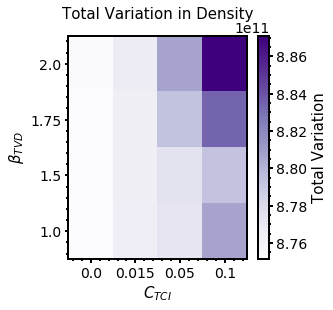

In [37]:
tvMat = np.zeros((4, 4))

tvMat[0,0] = tv[sims[12]]['uCF_D']
tvMat[0,1] = tv[sims[13]]['uCF_D']
tvMat[0,2] = tv[sims[14]]['uCF_D']
tvMat[0,3] = tv[sims[15]]['uCF_D']
tvMat[1,0] = tv[sims[8]]['uCF_D']
tvMat[1,1] = tv[sims[9]]['uCF_D']
tvMat[1,2] = tv[sims[10]]['uCF_D']
tvMat[1,3] = tv[sims[11]]['uCF_D']
tvMat[2,0] = tv[sims[4]]['uCF_D']
tvMat[2,1] = tv[sims[5]]['uCF_D']
tvMat[2,2] = tv[sims[6]]['uCF_D']
tvMat[2,3] = tv[sims[7]]['uCF_D']
tvMat[3,0] = tv[sims[0]]['uCF_D']
tvMat[3,1] = tv[sims[1]]['uCF_D']
tvMat[3,2] = tv[sims[2]]['uCF_D']
tvMat[3,3] = tv[sims[3]]['uCF_D']



plt.figure(figsize = (8,4))
#plt.rcParams["figure.figsize"] = [15,4]
cmap = plt.get_cmap('Purples')
cax = plt.matshow(tvMat, cmap = cmap)
cax.cmap.set_under('whitesmoke')
#cax.set_clim(0,1.5)
cbar = plt.colorbar(cax)
cbar.set_label(r'Total Variation', fontsize=15)


### Set the axes settings
Bvals = [2.0, 1.75, 1.5, 1.0]
ax = plt.gca() # grab the current axis
yticks = ax.set_yticks((range(4)))
ax.set_yticklabels(Bvals)
ax.set_ylabel(r"$\beta_{TVD}$", fontsize=15)

Cvals = [0.0, 0.015, 0.05, 0.1]
yticks = ax.set_xticks((range(len(Cvals))))
#ax.set_xticks(Cvals) # choose which x locations to have ticks
ax.set_xticklabels(Cvals) 
ax.xaxis.set_label_position('bottom')
ax.set_xlabel(r"$C_{TCI}$", fontsize=15)#,fontsize=16)
ax.xaxis.tick_bottom()

ax.set_title(r"Total Variation in Density",fontsize=15)

ax.set_aspect('auto')

# plt.show()

Total Variation in $y_{e}$

<Figure size 576x288 with 0 Axes>

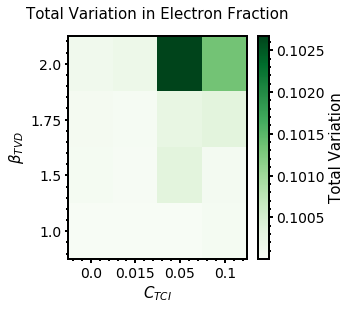

In [38]:
tvMat = np.zeros((4, 4))

tvMat[0,0] = tv[sims[12]]['uAF_Ye']
tvMat[0,1] = tv[sims[13]]['uAF_Ye']
tvMat[0,2] = tv[sims[14]]['uAF_Ye']
tvMat[0,3] = tv[sims[15]]['uAF_Ye']
tvMat[1,0] = tv[sims[8]]['uAF_Ye']
tvMat[1,1] = tv[sims[9]]['uAF_Ye']
tvMat[1,2] = tv[sims[10]]['uAF_Ye']
tvMat[1,3] = tv[sims[11]]['uAF_Ye']
tvMat[2,0] = tv[sims[4]]['uAF_Ye']
tvMat[2,1] = tv[sims[5]]['uAF_Ye']
tvMat[2,2] = tv[sims[6]]['uAF_Ye']
tvMat[2,3] = tv[sims[7]]['uAF_Ye']
tvMat[3,0] = tv[sims[0]]['uAF_Ye']
tvMat[3,1] = tv[sims[1]]['uAF_Ye']
tvMat[3,2] = tv[sims[2]]['uAF_Ye']
tvMat[3,3] = tv[sims[3]]['uAF_Ye']

plt.figure(figsize = (8,4))
#plt.rcParams["figure.figsize"] = [15,4]
cmap = plt.get_cmap('Greens')
cax = plt.matshow(tvMat, cmap = cmap)
cax.cmap.set_under('whitesmoke')
#cax.set_clim(0,1.5)
cbar = plt.colorbar(cax)
cbar.set_label(r'Total Variation', fontsize=15)


### Set the axes settings
Bvals = [2.0, 1.75, 1.5, 1.0]
ax = plt.gca() # grab the current axis
yticks = ax.set_yticks((range(4)))
ax.set_yticklabels(Bvals)
ax.set_ylabel(r"$\beta_{TVD}$", fontsize=15)

Cvals = [0.0, 0.015, 0.05, 0.1]
yticks = ax.set_xticks((range(len(Cvals))))
#ax.set_xticks(Cvals) # choose which x locations to have ticks
ax.set_xticklabels(Cvals) 
ax.xaxis.set_label_position('bottom')
ax.set_xlabel(r"$C_{TCI}$", fontsize=15)#,fontsize=16)
ax.xaxis.tick_bottom()

ax.set_title(r"Total Variation in Electron Fraction",fontsize=15)

ax.set_aspect('auto')



Error for $y_{e}$

<Figure size 576x288 with 0 Axes>

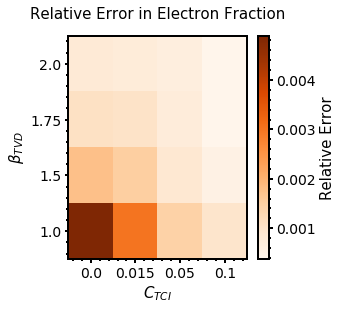

In [39]:
errMat = np.zeros((4, 4))

errMat[0,0] = error[sims[12]]['uAF_Ye']
errMat[0,1] = error[sims[13]]['uAF_Ye']
errMat[0,2] = error[sims[14]]['uAF_Ye']
errMat[0,3] = error[sims[15]]['uAF_Ye']
errMat[1,0] = error[sims[8]]['uAF_Ye']
errMat[1,1] = error[sims[9]]['uAF_Ye']
errMat[1,2] = error[sims[10]]['uAF_Ye']
errMat[1,3] = error[sims[11]]['uAF_Ye']
errMat[2,0] = error[sims[4]]['uAF_Ye']
errMat[2,1] = error[sims[5]]['uAF_Ye']
errMat[2,2] = error[sims[6]]['uAF_Ye']
errMat[2,3] = error[sims[7]]['uAF_Ye']
errMat[3,0] = error[sims[0]]['uAF_Ye']
errMat[3,1] = error[sims[1]]['uAF_Ye']
errMat[3,2] = error[sims[2]]['uAF_Ye']
errMat[3,3] = error[sims[3]]['uAF_Ye']

plt.figure(figsize = (8,4))
#plt.rcParams["figure.figsize"] = [15,4]
cmap = plt.get_cmap('Oranges')
cax = plt.matshow(errMat, cmap = cmap)
cax.cmap.set_under('whitesmoke')
#cax.set_clim(0,1.5)
cbar = plt.colorbar(cax)
cbar.set_label(r'Relative Error', fontsize=15)


### Set the axes settings
Bvals = [2.0, 1.75, 1.5, 1.0]
ax = plt.gca() # grab the current axis
yticks = ax.set_yticks((range(4)))
ax.set_yticklabels(Bvals)
ax.set_ylabel(r"$\beta_{TVD}$", fontsize=15)

Cvals = [0.0, 0.015, 0.05, 0.1]
yticks = ax.set_xticks((range(len(Cvals))))
#ax.set_xticks(Cvals) # choose which x locations to have ticks
ax.set_xticklabels(Cvals) 
ax.xaxis.set_label_position('bottom')
ax.set_xlabel(r"$C_{TCI}$", fontsize=15)#,fontsize=16)
ax.xaxis.tick_bottom()

ax.set_title(r"Relative Error in Electron Fraction",fontsize=15)

ax.set_aspect('auto')

Plot! Compare to 'Analytic' Diagonals, Red is Winner (2.0, 0.2)

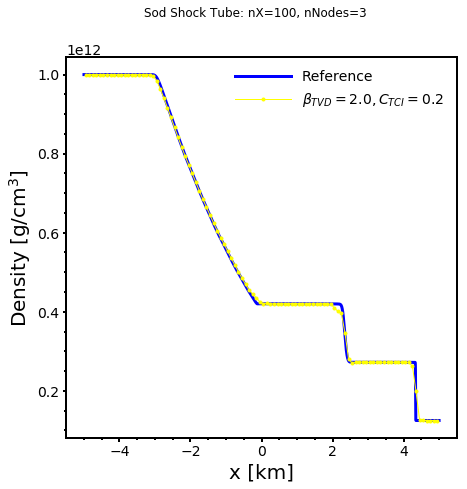

In [16]:
sims = ["100_B1.0_C0.0_3", "100_B1.0_C1.5E-2_3", "100_B1.0_C5E-2_3", "100_B1.0_C1.0E-1_3",
        "100_B1.5_C0.0_3", "100_B1.5_C1.5E-2_3", "100_B1.5_C5E-2_3","100_B1.5_C1.0E-1_3",
       "100_B1.75_C0.0_3", "100_B1.75_C1.5E-2_3", "100_B1.75_C5E-2_3","100_B1.75_C1.0E-1_3",
        "100_B2.0_C0.0_3", "100_B2.0_C1.5E-2_3", "100_B2.0_C5E-2_3", "100_B2.0_C1.0E-1_3"] #The desired run
fig, cax = plt.subplots(1, sharex=True,figsize=(7,7))

cax.plot(x1_ref,data_ref['uCF_D'], linestyle='-',linewidth=3.0, label="Reference", color = "blue")
#cax.plot(data_avg[sims[10]]['x1'],data_avg[sims[9]]['uCF_D'], marker='.',linestyle='-',linewidth=1.0, label=r"$\beta_{TVD} = 1.75, C_{TCI}=0.1$", alpha=1.0)
cax.plot(data_avg[sims[15]]['x1'],data_avg[sims[15]]['uCF_D'], marker='.',linestyle='-',linewidth=1.0, color='yellow',label=r"$\beta_{TVD} = 2.0, C_{TCI}=0.2$", alpha=1.0)



#cax.plot(x1,data['100_B1.0_C1.5E-2_3']['uCF_D'], linestyle='-', marker='.',markersize=2,linewidth=0.75, label=r"$\beta_{TVD} = 1.0, C_{TCI}=1.5*10^{-2}$", alpha=1.0)





cax.legend()
fig.suptitle("Sod Shock Tube: nX=100, nNodes=3")
# for ax in cax.flat:
#     ax.set(xlabel='x-label', ylabel='y-label')

cax.set(xlabel="x [km]",ylabel = r'Density [g/cm$^3$]')

#plt.savefig(figDir+"sod_nuclear_char_t.png", dpi=300, format="png")

#Border width
# cax.spines['bottom'].set_linewidth(1.5)
# cax.spines['left'].set_linewidth(1.5)
# cax.spines['top'].set_linewidth(1.5)
# cax.spines['right'].set_linewidth(1.5)

plt.show()

Electron Fraction vs Reference

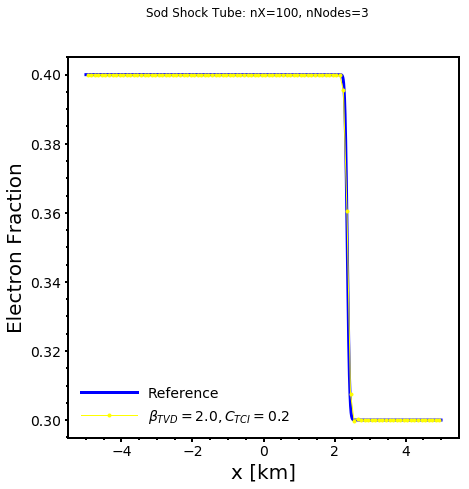

In [35]:
sims = ["100_B1.0_C0.0_3", "100_B1.0_C1.5E-2_3", "100_B1.0_C5E-2_3", "100_B1.0_C1.0E-1_3",
        "100_B1.5_C0.0_3", "100_B1.5_C1.5E-2_3", "100_B1.5_C5E-2_3","100_B1.5_C1.0E-1_3",
       "100_B1.75_C0.0_3", "100_B1.75_C1.5E-2_3", "100_B1.75_C5E-2_3","100_B1.75_C1.0E-1_3",
        "100_B2.0_C0.0_3", "100_B2.0_C1.5E-2_3", "100_B2.0_C5E-2_3", "100_B2.0_C1.0E-1_3"] #The desired run


fig, cax = plt.subplots(1, sharex=True,figsize=(7,7))

cax.plot(x1_ref,data_ref['uAF_Ye'], linestyle='-',linewidth=3.0, label="Reference", color = "blue")
cax.plot(data_avg[sims[15]]['x1'],data_avg[sims[15]]['uAF_Ye'], marker='.',linestyle='-',linewidth=1.0, color='yellow',label=r"$\beta_{TVD} = 2.0, C_{TCI}=0.2$", alpha=1.0)




#cax.plot(x1,data['100_B1.0_C1.5E-2_3']['uCF_D'], linestyle='-', marker='.',markersize=2,linewidth=0.75, label=r"$\beta_{TVD} = 1.0, C_{TCI}=1.5*10^{-2}$", alpha=1.0)





cax.legend()
fig.suptitle("Sod Shock Tube: nX=100, nNodes=3")
# for ax in cax.flat:
#     ax.set(xlabel='x-label', ylabel='y-label')

cax.set(xlabel="x [km]",ylabel = r'Electron Fraction')


plt.show()

Plot! Density

In [25]:
fig, cax = plt.subplots(2, sharex=True,figsize=(8,8))

cax[0].plot(x1_cw,data_cw['uCF_D'], linestyle='-', marker='.',linewidth=1.0, label="No Characteristic Limiting", color = "blue")
cax[0].plot(x1,data['uCF_D'], linestyle='-', marker='.',linewidth=0.75, label="Characteristic Limiting", color="red", alpha=1.0)

cax[1].plot(x1,data_cw['uAF_P'], linestyle='-', marker='.',linewidth=0.75, label="No Characteristic Limiting", color="blue", alpha=1.0)
cax[1].plot(x1,data['uAF_P'], linestyle='-', marker='.',linewidth=0.75, label="Characteristic Limiting", color="red", alpha=1.0)

cax[0].legend()
cax[1].legend()
fig.suptitle("Sod Shock Tube: nX=100, nNodes=3")
# for ax in cax.flat:
#     ax.set(xlabel='x-label', ylabel='y-label')

cax[0].set(ylabel = r'Density [g/cm$^3$]')
cax[1].set(xlabel="x [km]", ylabel = r'Pressure [erg/cm$^3$]')

#plt.savefig(figDir+"sod_nuclear_char_t.png", dpi=300, format="png")

plt.show()

FigureCanvasNbAgg()

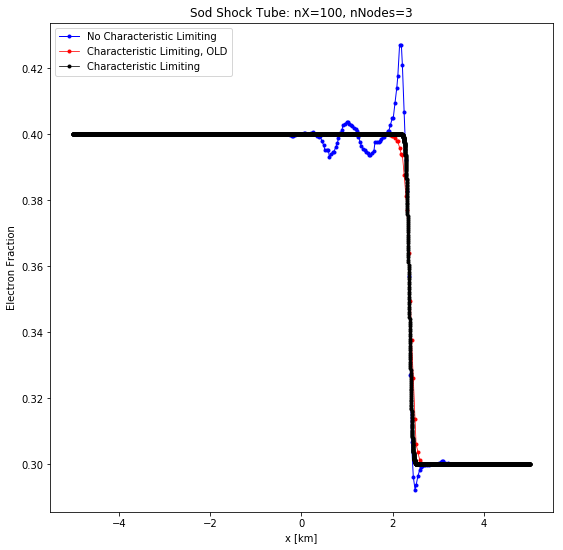

In [22]:
fig, ax1 = plt.subplots(1,figsize=(9,9))

ye_char = []
ye_char[:] = data['uCF_Ne'][:]* mb / data['uCF_D'][:]

ye_cw = []
ye_cw[:] = data_cw['uCF_Ne'][:]* mb / data_cw['uCF_D'][:]

ye_test = []
ye_test[:] = data_test['uCF_Ne'][:]* mb / data_test['uCF_D'][:]

ax1.plot(x1,ye, linestyle='-', marker='.',linewidth=1.0, label="No Characteristic Limiting", color = "blue")
ax1.plot(x1,ye_char, linestyle='-', marker='.',linewidth=0.75, label="Characteristic Limiting, OLD", color="red", alpha=1.0)
ax1.plot(x1_test,ye_test, linestyle='-', marker='.',linewidth=0.75, label="Characteristic Limiting", color="black", alpha=1.0)



ax1.legend()
plt.title("Sod Shock Tube: nX=100, nNodes=3")
ax1.set(xlabel='x [km]',ylabel="Electron Fraction")

#plt.savefig(figDir+"sod_nuclear_char_t.png", dpi=300, format="png")

plt.show()